# Using descriptive statistics to find out website performance.

### Q1. Overview of Metrics

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math 
import statistics
import squarify 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None  # default='warn'

In [2]:
#read file 
data = pd.read_csv('tripvn.csv')

In [3]:
#clean data
for i in range(0,len(data)):
    data.Time[i] = data.Time[i].replace(":00 PM", "")
    data.Time[i] = data.Time[i].replace(":00 AM", "")
data['Time'] = pd.to_datetime(data['Time'])
data.tail()

,Unnamed: 0,Test,Time,Mdn DNS (ms),Mdn SSL (ms),Avg Time To First Byte (ms),Mdn Webpage Response (ms),Mdn Render Start (ms),Avg Image Bytes,Avg Script Bytes,Avg Css Bytes,% Availability,# Runs
355,355,[204709] - trip.com,2017-11-30 02:00:00,173.0,NaN,952.33,9924.0,1084.0,729606.45,538064.82,10762.73,83.333,12
356,356,[204709] - trip.com,2017-11-30 04:00:00,352.0,NaN,533.33,10449.0,1195.0,908992.58,582276.42,10765.92,100.000,12
357,357,[204709] - trip.com,2017-11-30 06:00:00,351.0,NaN,493.83,9370.5,1298.5,771258.33,581006.33,10765.08,100.000,12
358,358,[204709] - trip.com,2017-11-30 08:00:00,291.5,NaN,612.00,9881.5,1247.0,685265.08,581263.17,10763.33,100.000,12
359,359,[204709] - trip.com,2017-11-30 10:00:00,298.5,NaN,676.83,9175.0,1097.5,785543.17,578519.08,10760.42,100.000,12


#### Table overview of 12 metrics

In [4]:
d1 = {'Metrics':['Values/Descriptive statistics'],
      'Test':[data['Test'].unique()],
      'Time':[data['Time'].agg(['min','max'])],
     'Mdn DNS (ms)':[data['Mdn DNS (ms)'].agg(['min','max','std','mean'])],
     'Mdn SSL (ms)':['Nah'],
     'Avg Time To First Byte (ms)':[data['Avg Time To First Byte (ms)'].agg(['min','max','std','mean'])],
     'Mdn Webpage Response (ms)':[data['Mdn Webpage Response (ms)'].agg(['min','max','std','mean'])],
     'Mdn Render Start (ms)':[data['Mdn Render Start (ms)'].agg(['min','max','std','mean'])],
     'Avg Image Bytes':[data['Avg Image Bytes'].agg(['min','max','std','mean'])],
     'Avg Script Bytes':[data['Avg Script Bytes'].agg(['min','max','std','mean'])],
     'Avg Css Bytes':[data['Avg Css Bytes'].agg(['min','max','std','mean'])],
     '% Availability':[data['% Availability'].agg(['min','max','std','mean'])],
     '# Runs':[data['# Runs'].agg(['min', 'max'])]}
df1 = pd.DataFrame(data=d1).transpose()
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
df1

,0
Metrics,Values/Descriptive statistics
Test,[[204709] - trip.com]
Time,"min 2017-11-01 00:00:00 max 2017-11-30 12:00:00 Name: Time, dtype: datetime64[ns]"
Mdn DNS (ms),"min 108.500000 max 531.500000 std 70.513539 mean 280.076389 Name: Mdn DNS (ms), dtype: float64"
Mdn SSL (ms),Nah
Avg Time To First Byte (ms),"min 209.750000 max 1957.580000 std 286.766903 mean 593.206944 Name: Avg Time To First Byte (ms), dtype: float64"
Mdn Webpage Response (ms),"min 7535.500000 max 30094.000000 std 1461.569220 mean 9593.341667 Name: Mdn Webpage Response (ms), dtype: float64"
Mdn Render Start (ms),"min 807.000000 max 2194.500000 std 192.891979 mean 1255.504167 Name: Mdn Render Start (ms), dtype: float64"
Avg Image Bytes,"min 566819.580000 max 908992.580000 std 61567.944565 mean 731153.379056 Name: Avg Image Bytes, dtype: float64"
Avg Script Bytes,"min 388817.400000 max 610802.170000 std 19237.706558 mean 573567.277056 Name: Avg Script Bytes, dtype: float64"


#### Heat map to show the correlations of the metrics

[Text(0.5, 0, 'Unnamed: 0'),
 Text(1.5, 0, 'Mdn DNS (ms)'),
 Text(2.5, 0, 'Mdn SSL (ms)'),
 Text(3.5, 0, 'Avg Time To First Byte (ms)'),
 Text(4.5, 0, 'Mdn Webpage Response (ms)'),
 Text(5.5, 0, 'Mdn Render Start (ms)'),
 Text(6.5, 0, 'Avg Image Bytes'),
 Text(7.5, 0, 'Avg Script Bytes'),
 Text(8.5, 0, 'Avg Css Bytes'),
 Text(9.5, 0, '% Availability'),
 Text(10.5, 0, '# Runs')]

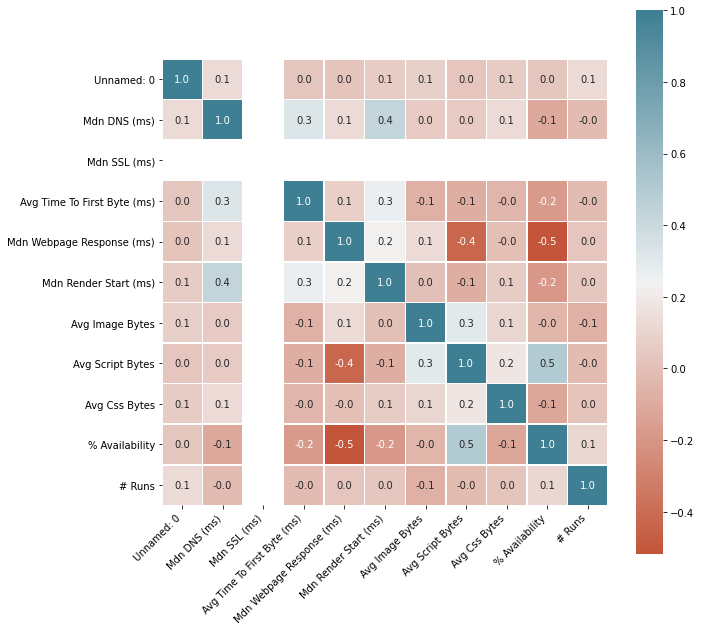

In [5]:
f,ax = plt.subplots(figsize=(10,10))
sns.heatmap(data.corr()
            ,annot=True,
            linewidths=.5,
            fmt= '.1f',
            cmap=sns.diverging_palette(20, 220, n=200),
            square=True)
ax.set_xticklabels(
            ax.get_xticklabels(),
            rotation=45,
            horizontalalignment='right')

The map above shows the correlations of the metrics. Using the definition of heat map, I see that there're two pairs being slightly more correlative than others. The first pair is Mdn Webpage Response(ms) and % Availability, the another one is Mdn Webpage Response(ms) and Avg Script Bytes. As those are in negative correlation ( -0.5 and -0.4 ), those are in contrary relationship, which means if a metric increases, the another decreases. 

### Q2. Website Speed Metrics Analysis


In this section, I focus to the metrics that describe the speed of website including : Mdn DNS (ms), Avg Time To First Byte (ms), Mdn Webpage Reponse (ms) and Mdn Render Start

From the definition table provided, I pick key informations for further analysis :

- Mdn DNS (ms) : According to YSlow, the average value take accounts around 20-120ms
- Avg Time To First Byte (ms) : According to KeyCDN, a proper TTFB would be suggested to less than 400 ms
- Mdn Webpage Response (ms) : The average is around 9593 ms
- Mdn Render Start (ms) : The start of render time is suggested to be within 2 seconds

#### Mdn DNS analysis

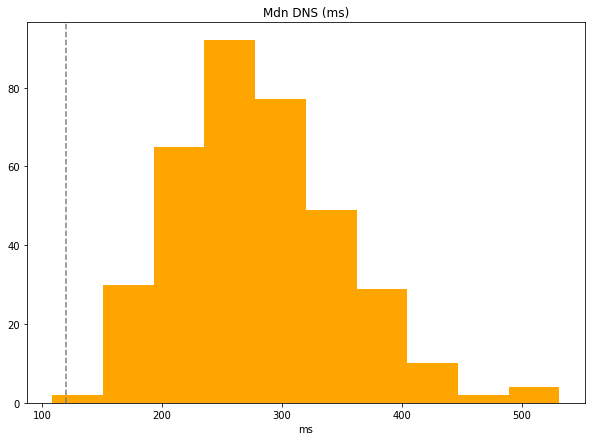

In [6]:
plt.figure(figsize = (10, 7)) 
x = data["Mdn DNS (ms)"]   
plt.hist(x,color = "orange") 
plt.title("Mdn DNS (ms)") 
plt.xlabel("ms") 
plt.axvline(x=120,color='gray',linestyle='--')


Looking to the graph, the gray line expresses the average value of Mdn DNS (120ms), however, the graph insists the average metrics of this website around 250-280ms, which is much higher than the average provided by YSlow. Also, there's time that time to find IP of is significant high (around 500ms or higher). Those are shown below.

In [7]:
df = data.loc[data['Mdn DNS (ms)']>500]
print(df[['Mdn DNS (ms)','Time']])

     Mdn DNS (ms)                Time
103  508.5        2017-11-09 14:00:00
234  526.5        2017-11-20 12:00:00
340  531.5        2017-11-29 08:00:00


#### Avg Time To First Byte analysis

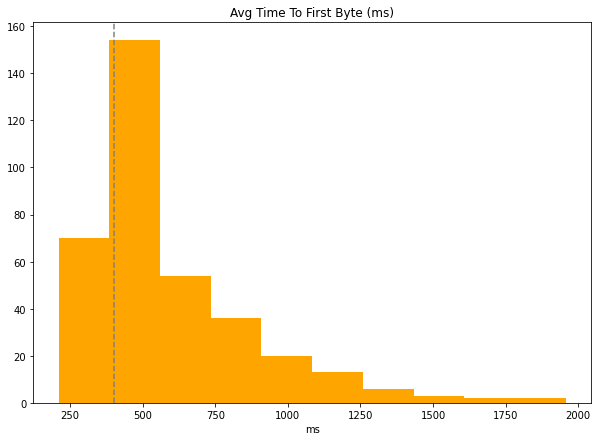

In [8]:
plt.figure(figsize = (10, 7)) 
x = data["Avg Time To First Byte (ms)"]   
plt.hist(x,color = "orange") 
plt.title("Avg Time To First Byte (ms)") 
plt.xlabel("ms") 
plt.axvline(x=400,color='gray',linestyle='--')

From the graph, the average value of this website is around 500ms, which is a little bit higher than the average value from KeyCND (400ms). Let's check when it takes significant time (outlier) to send request to the server and wait until the first byte of the response to the client.

In [9]:
df = data.loc[data['Avg Time To First Byte (ms)']>1600]
print(df[['Avg Time To First Byte (ms)','Time']])

     Avg Time To First Byte (ms)                Time
56   1716.36                     2017-11-05 16:00:00
234  1938.08                     2017-11-20 12:00:00
241  1957.58                     2017-11-21 02:00:00
293  1612.58                     2017-11-25 10:00:00


#### Mdn Webpage Response (ms)

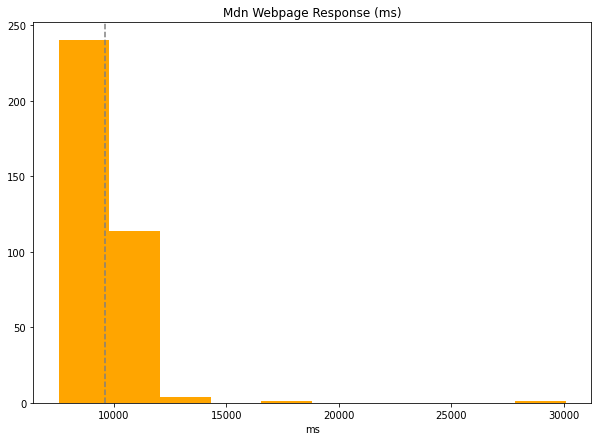

In [10]:
plt.figure(figsize = (10, 7)) 
x = data["Mdn Webpage Response (ms)"]   
plt.hist(x,color = "orange") 
plt.title("Mdn Webpage Response (ms)") 
plt.xlabel("ms") 
plt.axvline(x=9593,color='gray',linestyle='--')

In this category, the average response time of this website is slightly higher than the average acceptable metric (less than 9593ms). However, it has some outliers which showcase that the reponse time is surprisingly low, those are 18s and 30s. 

#### Mdn Render Start (ms)

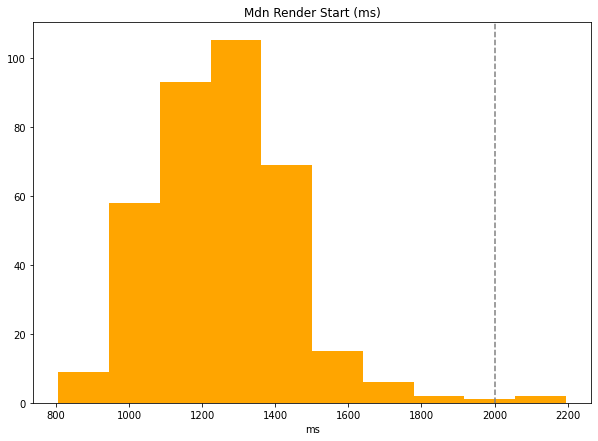

In [11]:
plt.figure(figsize = (10, 7)) 
x = data["Mdn Render Start (ms)"]   
plt.hist(x,color = "orange") 
plt.title("Mdn Render Start (ms)") 
plt.xlabel("ms") 
plt.axvline(x=2000,color='gray',linestyle='--')

This graphs show great performance from the website, almost all metrics are lower than the acceptable metric(2s). There are two outliers, which can be shown below.

In [12]:
df = data.loc[data['Mdn Render Start (ms)']>2000]
print(df[['Mdn Render Start (ms)','Time']])

     Mdn Render Start (ms)                Time
43   2094.5                2017-11-04 14:00:00
103  2194.5                2017-11-09 14:00:00


### Q3. Website Content Analysis



Text(0.5, 0, 'ms')

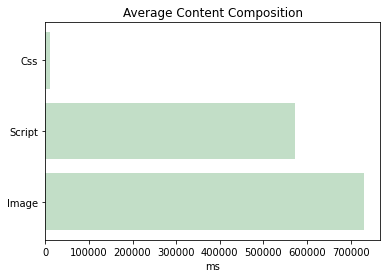

In [13]:
fig, ax = plt.subplots()
Image = data['Avg Image Bytes'].mean()
Script = data['Avg Script Bytes'].mean()
Css = data['Avg Css Bytes'].mean()
metrics = (Image,Script,Css)
names = ('Image','Script','Css')
y_pos = np.arange(len(metrics))
plt.barh(y_pos, metrics, align='center', alpha=0.5, color='#86bf91', zorder=1)
plt.yticks(y_pos, names)
plt.title('Average Content Composition')
plt.xlabel("ms") 

(0.0, 100.0, 0.0, 100.0)

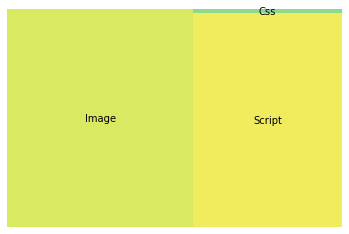

In [17]:
squarify.plot(sizes=metrics, label=names, alpha=0.7 )
plt.axis('off')

It's shown that Image and Script take most content of the website. The average size of Image, Script and Css respectively are 731153.4, 573567.3, 10767.4 bytes. Hence, the average of all content metrics are 1315488.1
bytes = 1315.49KB. In comparison with the size of traveloka.com which has 878.1KB, this websize has larger size of content. This might be the cause to bad performance of website. To increase performance, I suggest reducing the size of Image and Script of this website. 

In [25]:
metrics

(731153.3790555556, 573567.2770555556, 10767.403388888888)

In [26]:
731153.4 + 573567.3 + 10767.4

1315488.1

### Q4. Website Availability

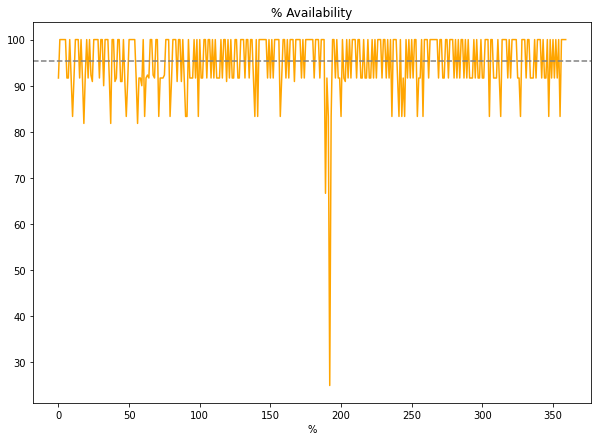

In [56]:
plt.figure(figsize = (10, 7)) 
x = data["% Availability"]  
plt.plot(x,color = "orange") 
plt.title("% Availability") 
plt.xlabel("%") 
plt.axhline(y=x.mean(),color='gray',linestyle='--')

Average availability of this website is 95% which is considered as good performance. However, there are outliers when the metric drops significantly. Let's check when this category metric drops. 

In [57]:
df = data.loc[data['% Availability']<70]
print(df[['% Availability','Time']])

     % Availability                Time
189  66.667         2017-11-16 06:00:00
192  25.000         2017-11-17 12:00:00


Text(0, 0.5, 'ms')

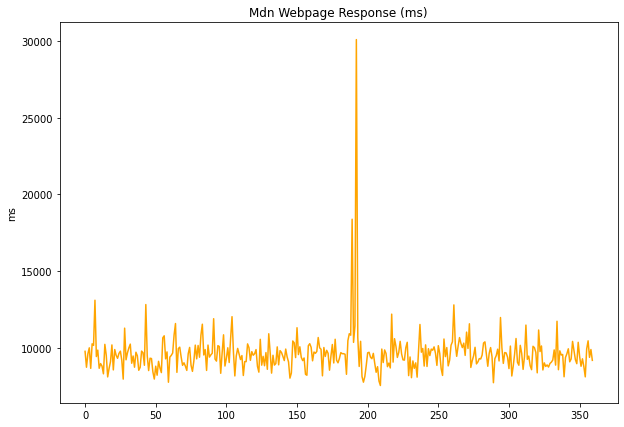

In [58]:
plt.figure(figsize = (10, 7)) 
x = data["Mdn Webpage Response (ms)"]   
plt.plot(x,color = "orange") 
plt.title("Mdn Webpage Response (ms)") 
plt.ylabel("ms") 

In the 1st question, I see that Mdn Webpage Response(ms) and % Availability are in contrary correlative. Thus, when checking, I see that when the availability of the website drops, this is time when the webpage has the highest response.